<a href="https://colab.research.google.com/github/amanullahshah32/Deep-Learning/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check the PyThon version
torch.__version__

'2.3.1+cu121'

## 1. **Data (Preparing and loading)**

In [4]:
 # Create known parameters
 weight = 0.7
 bias = .3

 # create data
 start = 0
 end = 1
 step = 0.02

 X = torch.arange(start, end, step).unsqueeze(dim=1) #; this is asumed as feature
 y = weight * X + bias

In [5]:
X[:10], y[:10], X.shape==y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 True)

### **Split data into training and test sets**

In [6]:
# Create train/test split
train_split = int(0.8 * len(X)) # 800% data used for training set, 20% data for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Visualization

In [7]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=8, label='Training data', marker='D')

  # plot test data in red
  plt.scatter(test_data, test_labels, c='g', s=8, label = "Testing data", marker = 'o')

  if predictions is not None:
    #plot the predictions in green (predicitons were made on the test data)
    plt.scatter(test_data, predictions, c='r', s=8, label = "predictions")

    #Show the legend
  #plt.legend(prop={"size":14});
  plt.legend()

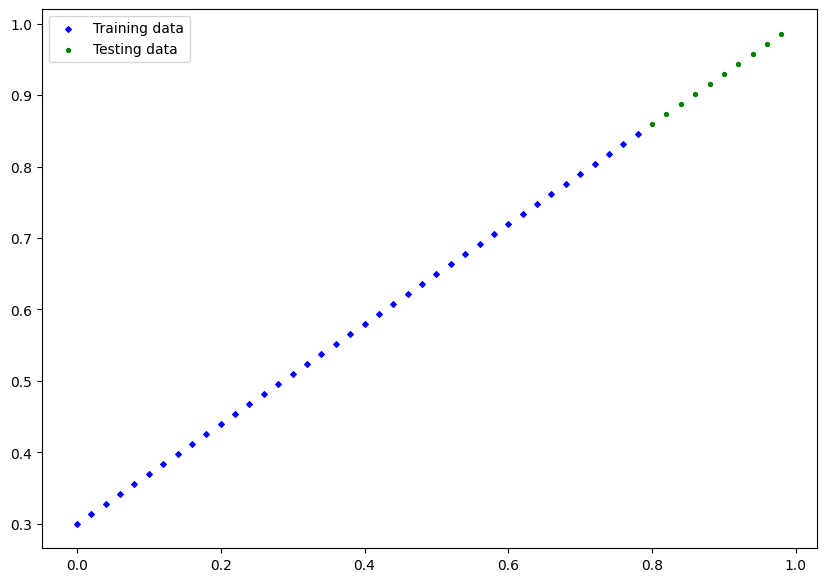

In [8]:
plot_prediction();

## **2. Build Model**

#### Let's replicate a standard linear regression model using pure PyTorch.

In [9]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorchis a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    """

    Args:
      self:
    """
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #start with random weights (this will get adjusted as the module learns)
                                            dtype= torch.float), # <- PyTorch loves float32 by default
                                            requires_grad= True) # can we update this values with gradient descent?)
    self.bias = nn.Parameter(torch.randn(1, # start with rnadom bias (this will get adjusted as the model learns)
                                         dtype= torch.float32), #pytorch loves float 32 as default
                             requires_grad= True) # can we update this value with gradient descent?
  # Forward defines the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # this is the linear regression formula (y=mx+c)

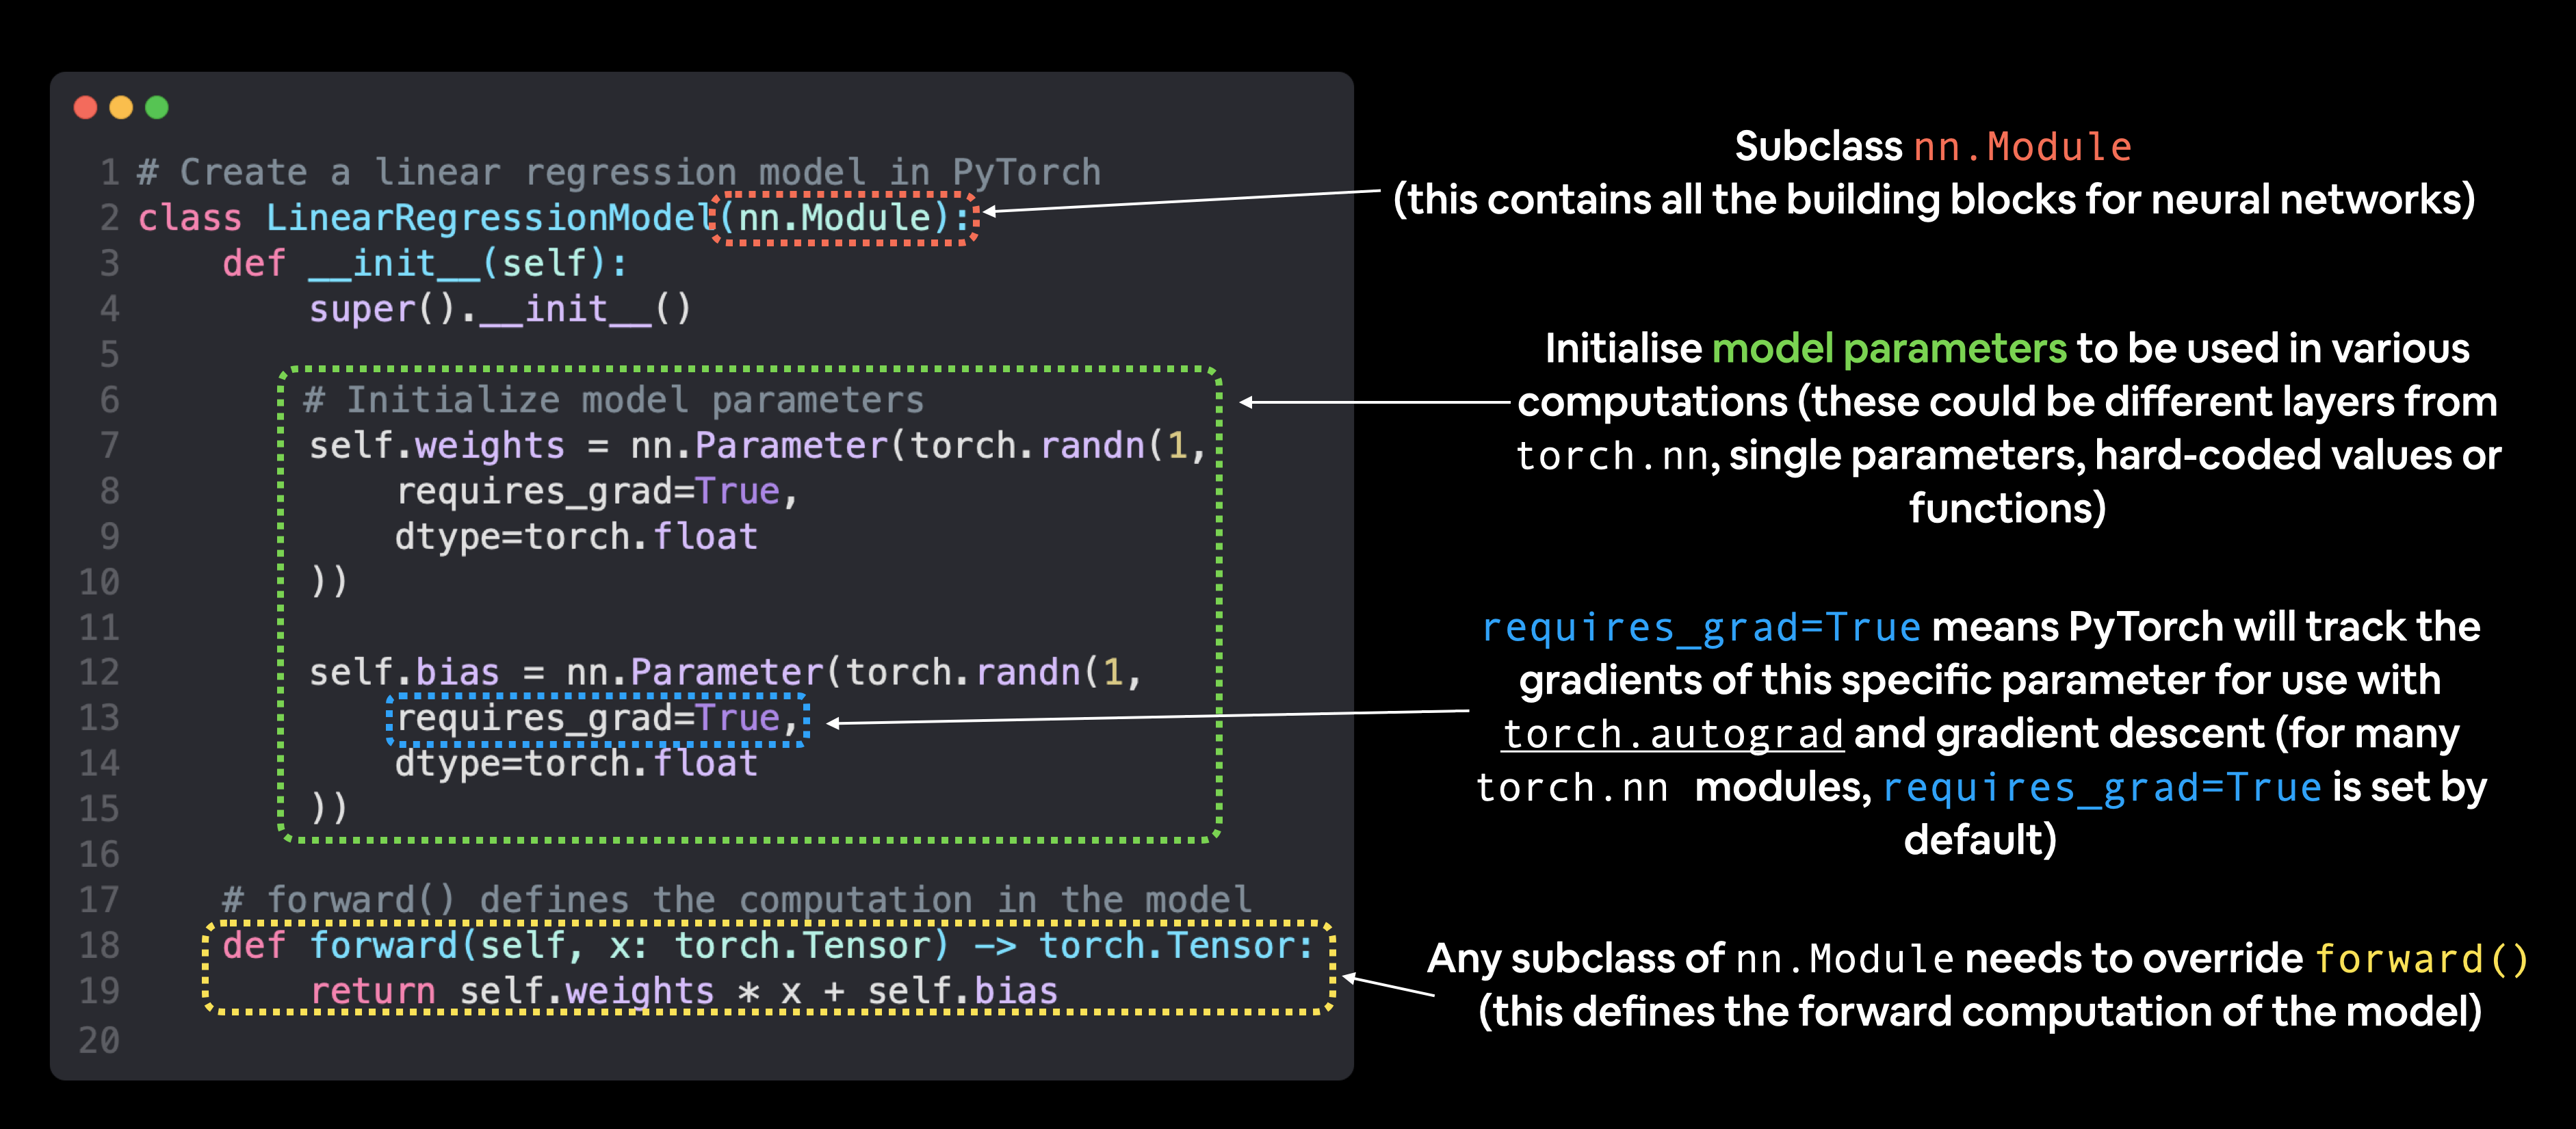

### **Checking the ocntents of a PyTorch model**
Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using .parameters().

In [10]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using `.state_dict()`

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### **Making predictions using `torch.inference_mode()`**

To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

Let's make some predictions.

In [12]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)


# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad()


We have made some predictions and look , how they do look like:

In [13]:
# Check the predicitons

print(f"Number of testing samples: {len(X_test)}\n")
print(f"Number of predictions made: {len(y_preds)}\n")
print(f"Predicted values: {y_preds}\n")

Number of testing samples: 10

Number of predictions made: 10

Predicted values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])



 let's visualize them with our plot_predictions() function we created above.

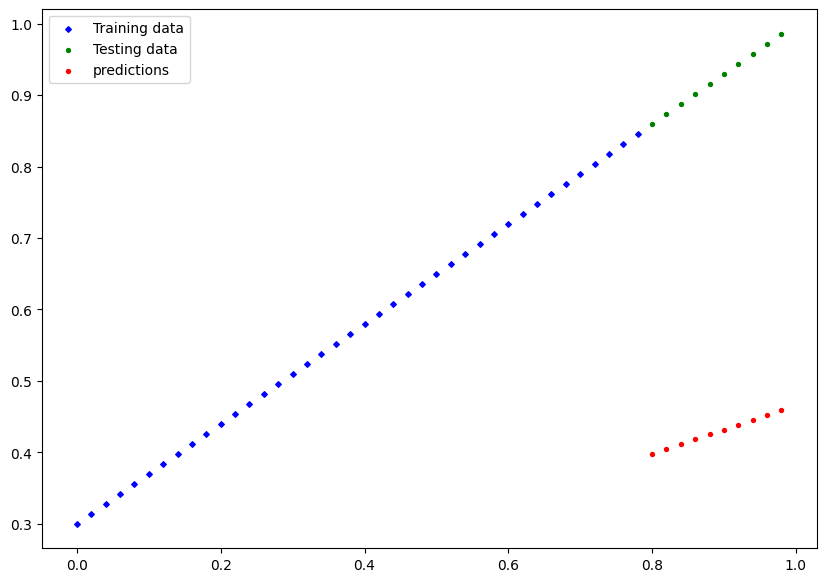

In [14]:
plot_prediction(predictions = y_preds)

In [15]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## **3. Train Model**

### **Creating a loss fiucntion and optimizer in PyTorch**

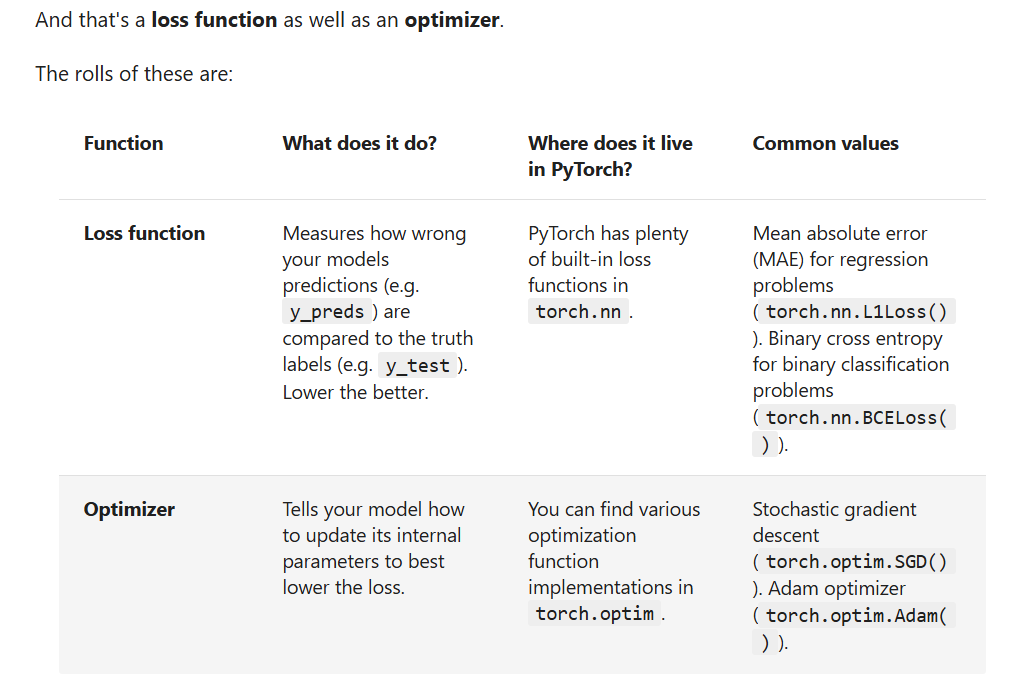


Let's create a loss function and an optimizer we can use to help improve our model.
For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss())` in PyTorch as our loss function.

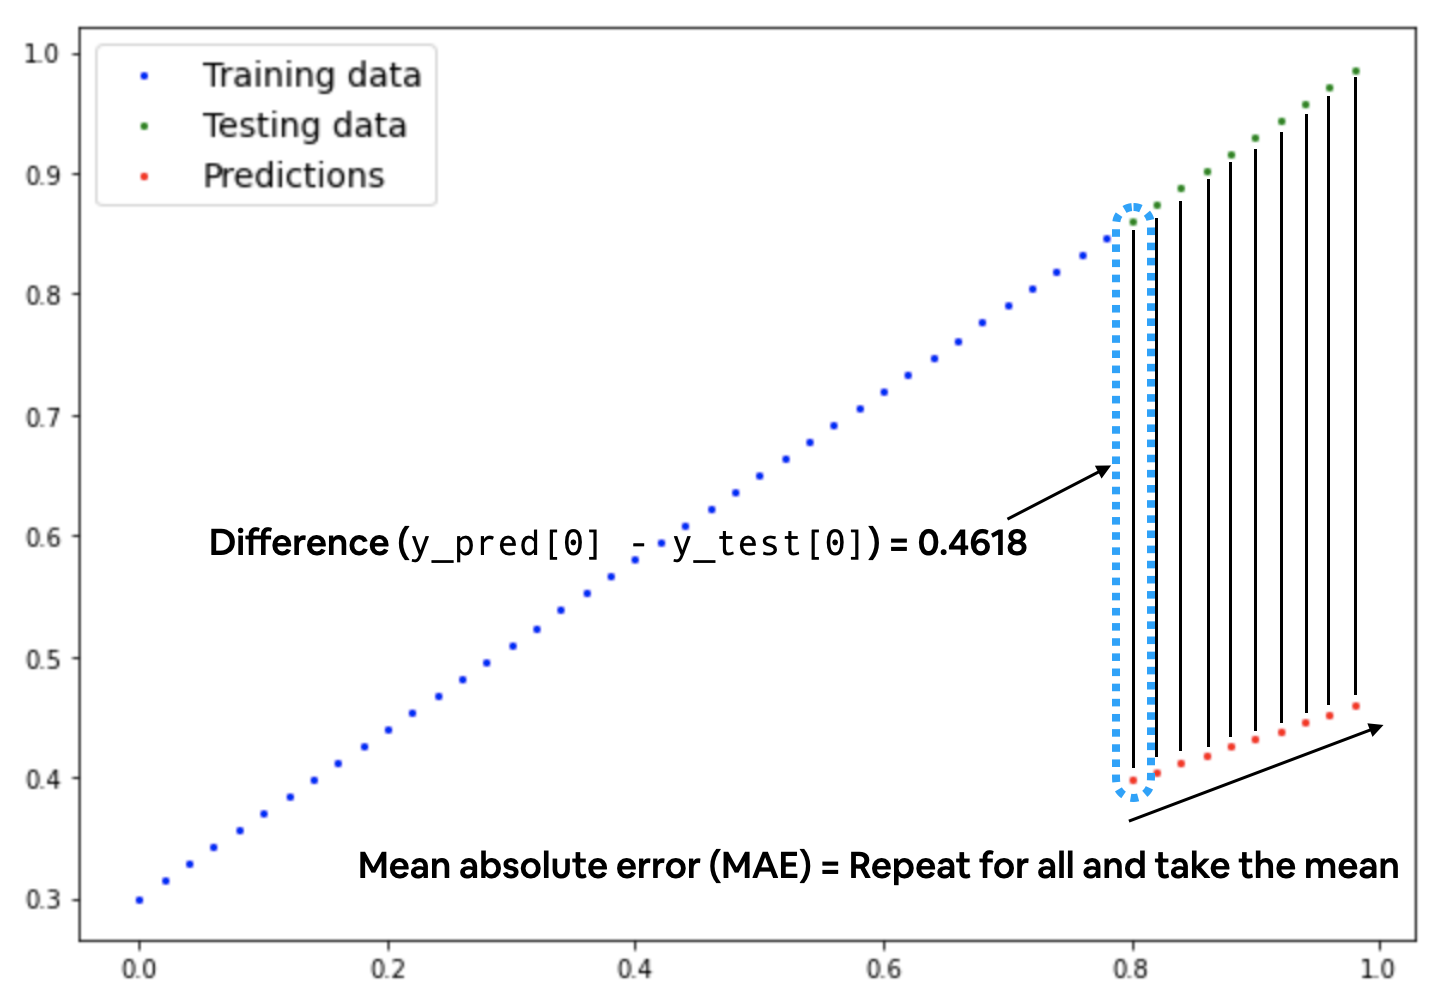

Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute

difference between two points (predictions and labels) and then takes the mean

across all examples.

And we'll use SGD, `torch.optim.SGD(params, lr)` where:
* `params` is the target model parameters you'd like to optimize (e.g the `weights` and 'bias' values we randomly set before)

* `lr` the **learning rate** you'd like to update the parameters at, higher means the optimizer will try larger updates.

In [16]:
# Create the loss function
loss_fn = nn.L1Loss() # MAR loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), # parameters of target model to optimize
                            lr=.01) # Learning rate (how much the optimizer should change parameters at each step)

### **Creating an optimization loop in PyTorch**

Time to create a training loop and testing loop

### **PyTorch training loop**

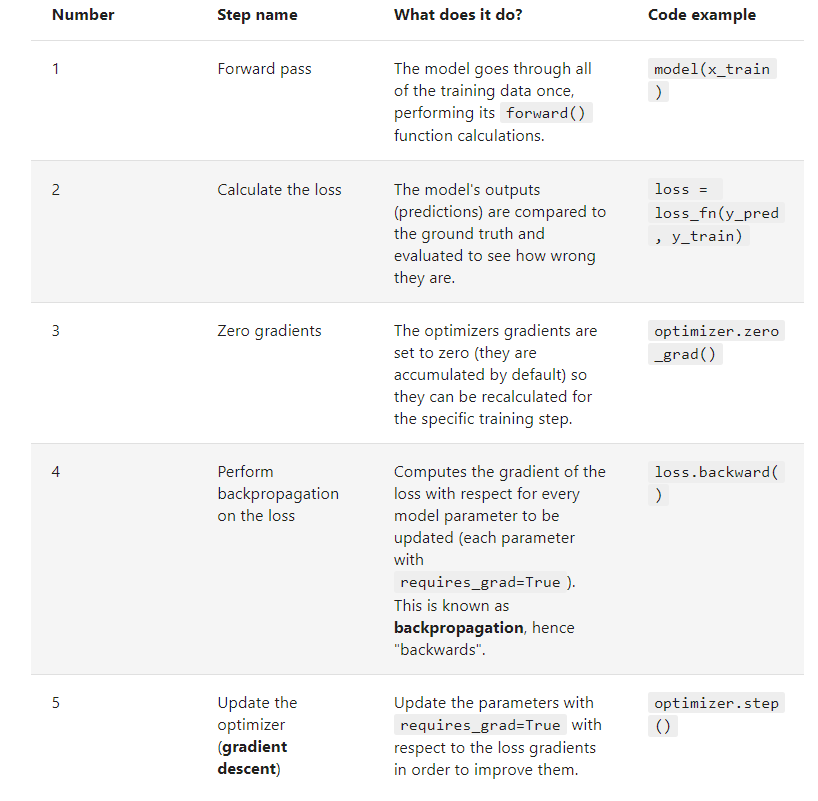

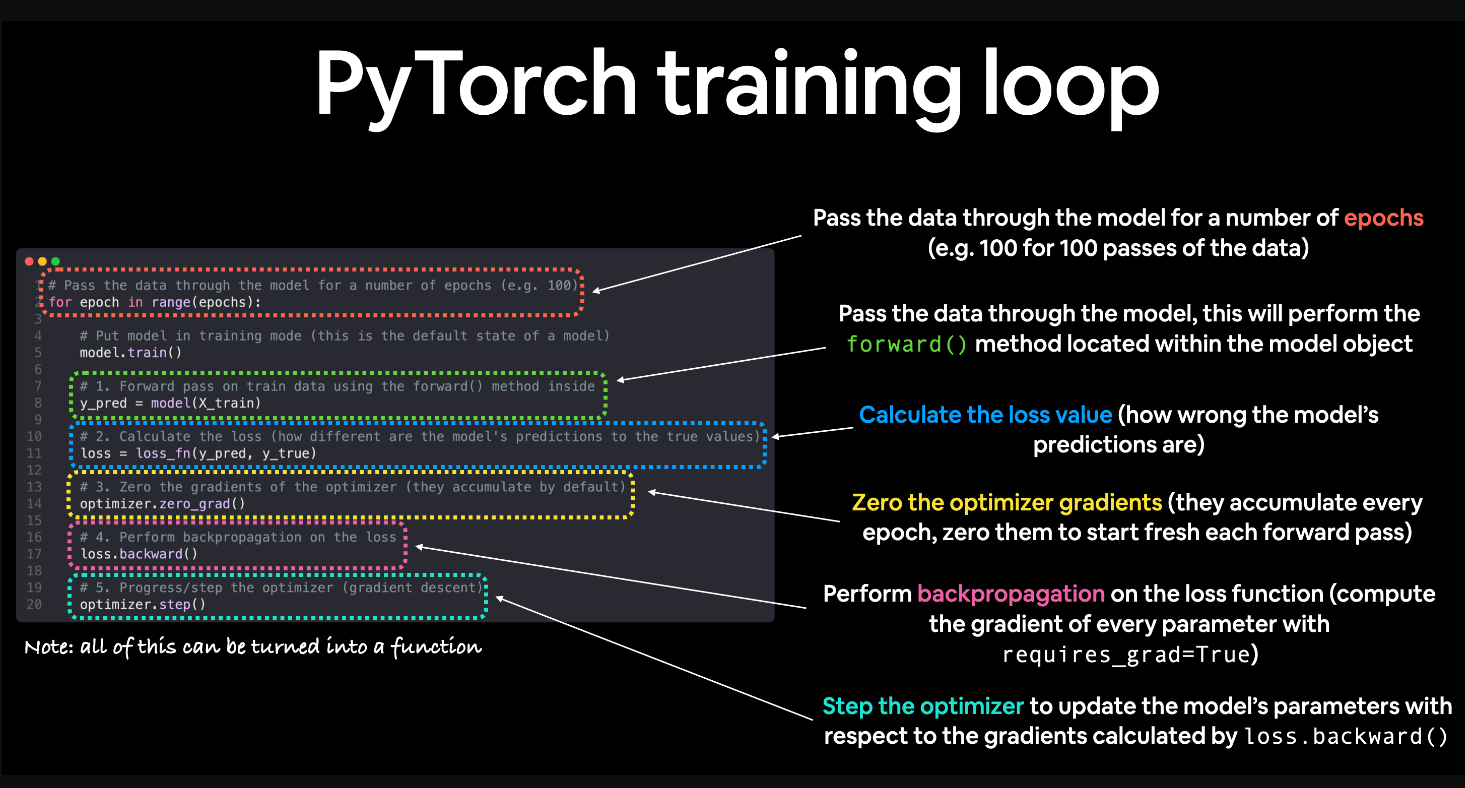

In [17]:
# # Pass the data through the model for a number of epochs (e.g. 100 )
# for epoch in range(epochs):
#   # Put model in training mode (this is the default state of a model)
#   model.train()

#   # 1. Forward pass on train data using the forward() method inside
#   y_pred = model(X_train)

#   # 2. Calculate the loss (how different are the model's predicitons to the true values)
#   loss = loss_fn(y_pred, y_true)

#   # 3. Zero the gradients of the optimizer (they accumulate by default)
#   optimizer.zero_grad()

#   # 4. perform backpropagation on the loss
#   loss.backward()

#   # 5. Progress/ step the optimizer (gradient descent)
#   optimizer.step()

### **PyTorch testing loop**|

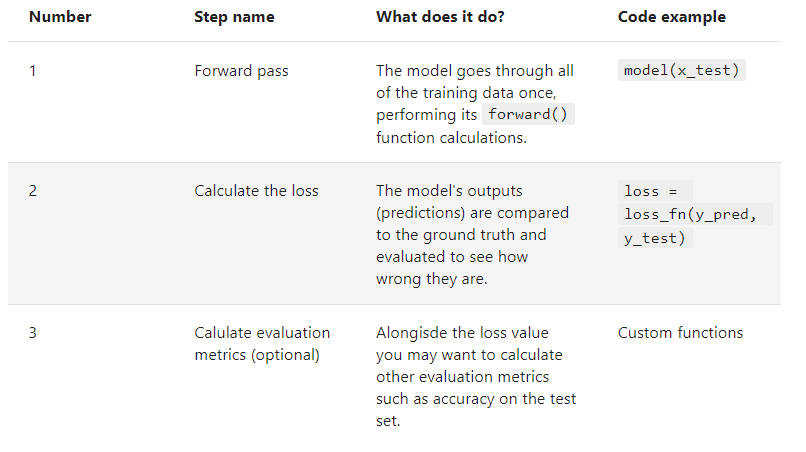

Notice the testing loop doesn't contain performing backpropagation `(loss.backward())`

 or stepping the optimizer `(optimizer.step())`, this is because no parameters in

 the model are being changed during testing, they've already been calculated.

 For testing, we're only interested in the output of the forward pass through

 the model.

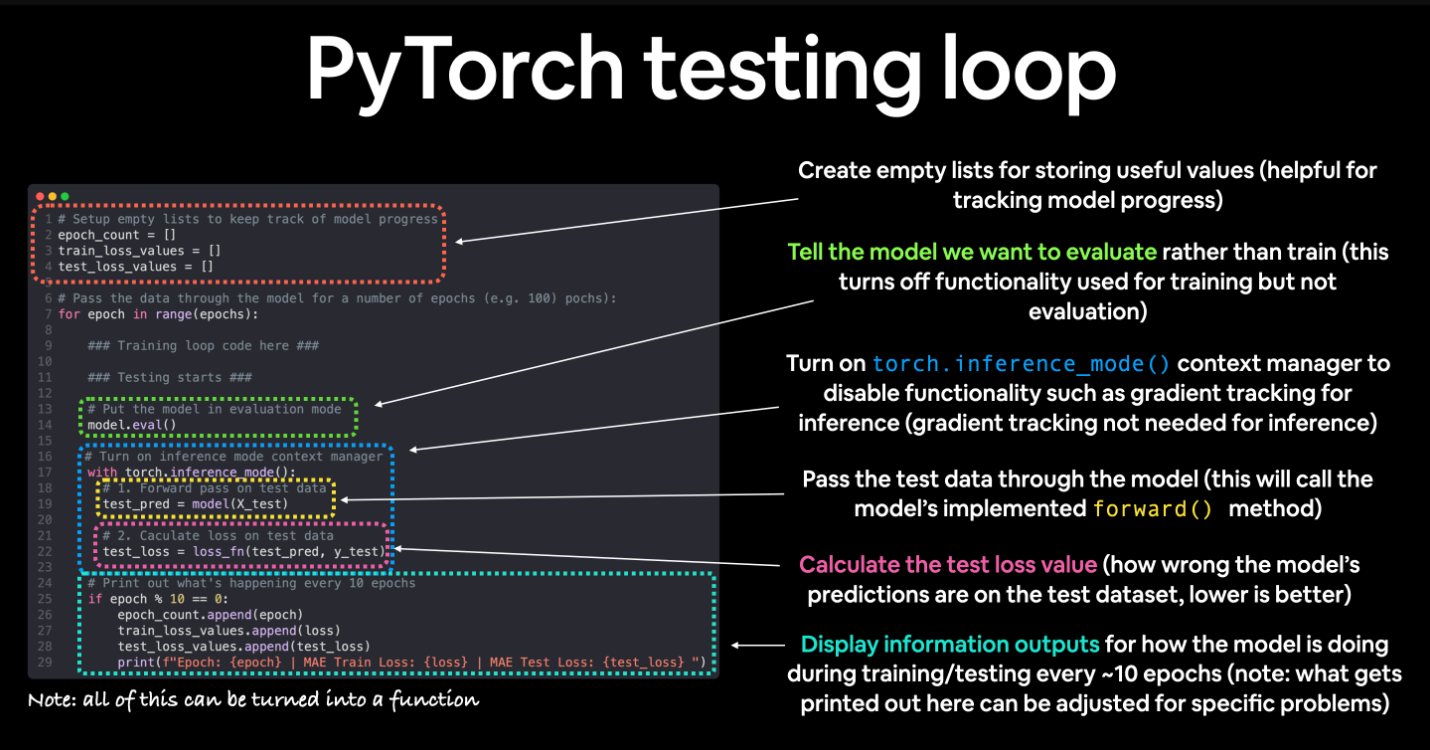

In [18]:
torch.manual_seed(1223)

# Set the number of epochs (how many times toe model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### training

  # Put model in training mode (this is the default state of a model)
  model_0.train()

  # 1. Forward pass on train data using the forward () method inside
  y_pred = model_0(X_train)
  #print(y_pred)

  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Progress the optimizer
  optimizer.step()


  ### Testing

  # Put the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass on test data
    test_pred = model_0(X_test)

    # 2. Calculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float)) #predictions come in torch.float datatype, so comparisons need to be done with tensors of the same data type

    # print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

      print(f"Epoch: {epoch}  ||  MAE Train Loss: {loss}  || MAE Test Loss: {test_loss}")



Epoch: 0  ||  MAE Train Loss: 0.31288138031959534  || MAE Test Loss: 0.48106518387794495
Epoch: 10  ||  MAE Train Loss: 0.1976713240146637  || MAE Test Loss: 0.3463551998138428
Epoch: 20  ||  MAE Train Loss: 0.08908725529909134  || MAE Test Loss: 0.21729660034179688
Epoch: 30  ||  MAE Train Loss: 0.053148526698350906  || MAE Test Loss: 0.14464017748832703
Epoch: 40  ||  MAE Train Loss: 0.04543796554207802  || MAE Test Loss: 0.11360953003168106
Epoch: 50  ||  MAE Train Loss: 0.04167863354086876  || MAE Test Loss: 0.09919948130846024
Epoch: 60  ||  MAE Train Loss: 0.03818932920694351  || MAE Test Loss: 0.08886633068323135
Epoch: 70  ||  MAE Train Loss: 0.03476089984178543  || MAE Test Loss: 0.0805937647819519
Epoch: 80  ||  MAE Train Loss: 0.03132382780313492  || MAE Test Loss: 0.07232122868299484
Epoch: 90  ||  MAE Train Loss: 0.02788739837706089  || MAE Test Loss: 0.06473556160926819
Epoch: 100  ||  MAE Train Loss: 0.024458957836031914  || MAE Test Loss: 0.05646304413676262
Epoch: 110 

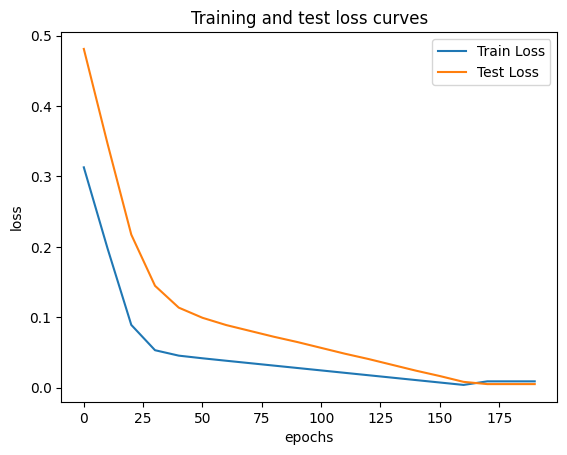

In [19]:
# Plot the loss curves

plt.plot(epoch_count, train_loss_values, label = 'Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title("Training and test loss curves")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [20]:
# Find our model's leraned parameters

print("The model learned the following values for weights and bias: \n ")
print(model_0.state_dict())
print(f"\n And the original values for weights and bias are, weights: {weight}, boas : {bias}")

The model learned the following values for weights and bias: 
 
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

 And the original values for weights and bias are, weights: 0.7, boas : 0.3


## **4. Making predictions with a trained PyTorch model( inference )**

* 1. Set the model in evaluation mode `mdoel.eval()`
* 2. Make the predictions using the inference mode context manager `with torch.inference_mode()`
* 3. All prediciotn should be made with objects on teh same device (CPU or GPU)

In [22]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. make sure the calcaulations are donw with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the cpu by default.
  # model_0.to(device)
  # X_test = X_test.to(device)

  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

Nice! We've made some predictions with our trained model, now how do they look?



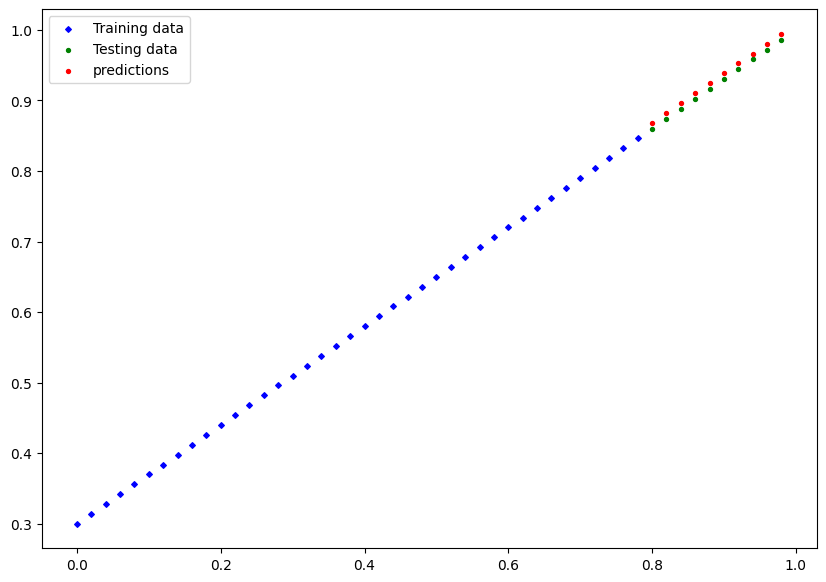

In [24]:
plot_prediction(predictions = y_preds)